# LAB 10 

SVD on images

For Gray Image - 
U.shape: (438, 438), 
S.shape:(438,), 
V.shape:(438, 669)


Text(0.5, 1.0, 'Grayscale Image')

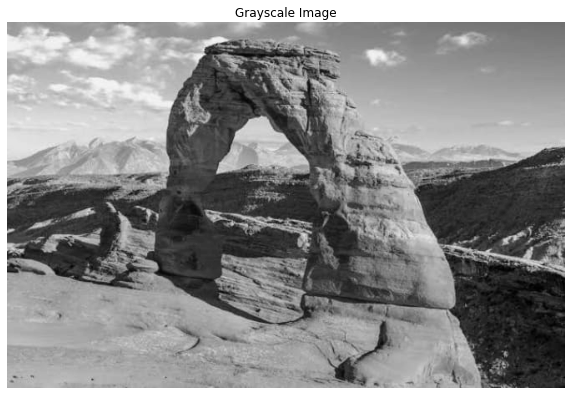

In [2]:
# Importing required Libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Getting the image from the stored location.
img = cv2.imread(r"C:\Users\HP\Downloads\WhatsApp Image 2023-05-01 at 09.28.17.png")

# Turning into Grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying SVD on Gray Image.
U, S, V = np.linalg.svd(gray_img, full_matrices = False)

# Inspecting shapes of the different matrices
print(f"For Gray Image - \nU.shape: {U.shape}, \nS.shape:{S.shape}, \nV.shape:{V.shape}")
# The output tells us that there are 720 different independent linear Components that the image can be divided/reduced into.

# Plotting the gray image.
plt.figure(figsize=(10,10))
plt.imshow(gray_img, cmap = "gray")
plt.axis('off')
plt.title("Grayscale Image")

Variance Explained by the top 20 Singular Vectors: 
[9.09491e-01 2.72270e-02 1.20600e-02 7.78400e-03 4.45000e-03 4.19800e-03
 3.06500e-03 2.54400e-03 2.27900e-03 1.81400e-03 1.50300e-03 1.44200e-03
 1.26300e-03 1.16700e-03 1.08200e-03 1.03700e-03 8.96000e-04 8.15000e-04
 7.32000e-04 6.65000e-04]


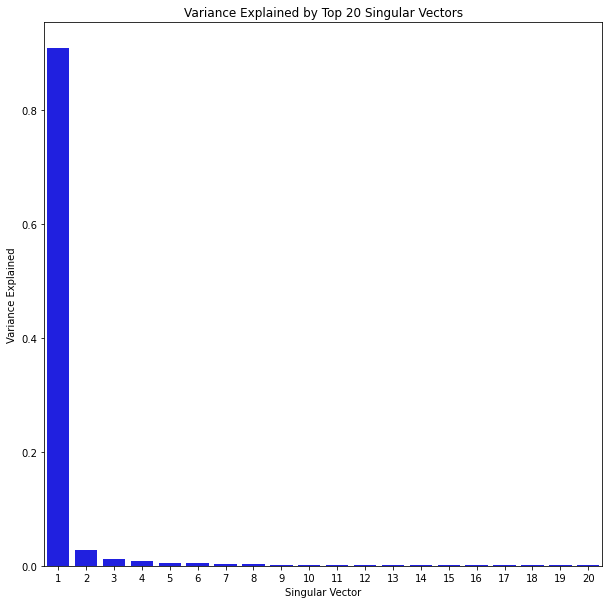

In [3]:
# We need to calculate the variance in order to find the relevant/important components.
import seaborn as sns

var_explained = np.round(S**2/np.sum(S**2), decimals = 6)

# Variance explained by top Singular Vectors.
print(f"Variance Explained by the top 20 Singular Vectors: \n{var_explained[0:20]}")

# Barplot for the Variance Explained by top 20 Singular Values.
plt.figure(figsize = (10,10))
sns.barplot(x = list(range(1,21)), y = var_explained[0:20], color = 'blue')

plt.title('Variance Explained by Top 20 Singular Vectors')
plt.xlabel('Singular Vector')
plt.ylabel('Variance Explained')
plt.show()

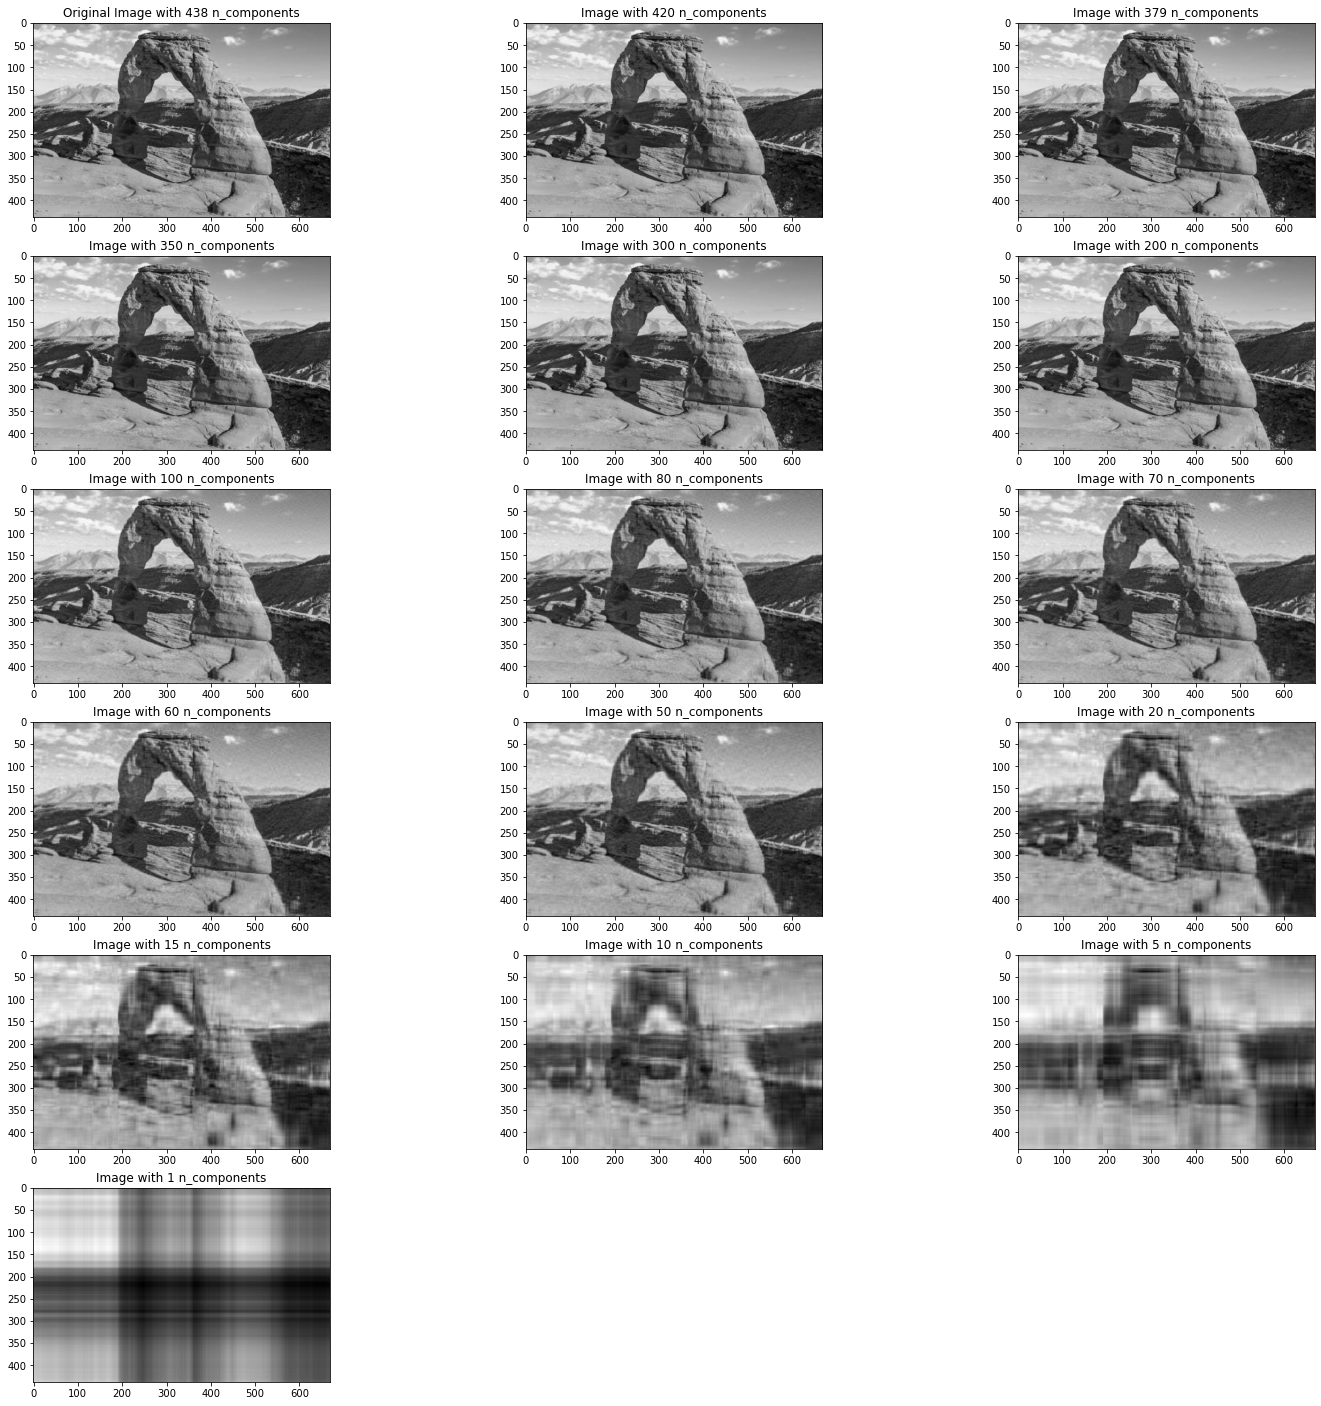

In [4]:
# Plotting images with different number of components.
comps = [438,420,379,350,300,200,100,80,70,60,50,20,15,10,5,1]
plt.figure(figsize = (25,25))

# Creating Image Matrices for various n_components.
for i in range(len(comps)):
    low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i],:]
    
    # If n_components = total components
    if (i==0):
        plt.subplot(6,3, i+1),
        plt.imshow(low_rank, cmap = "gray"),
        plt.title(f'Original Image with {comps[i]} n_components')
    
    # Images with n_components = i
    else:
        plt.subplot(6,3, i+1),
        plt.imshow(low_rank, cmap = "gray"),
        plt.title(f'Image with {comps[i]} n_components')

# Observation
We can see that the image is somewhat clear till 70 components. Hence it can be reduced to 70 components without compromising much of the clarity of the picture.